# Examining investor profiles in the tech industry: A data analysis

This notebook explores key metrics such as the number of investments by country, the distribution of investment stages across regions, and the involvement of various entities in funding tech startups.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel('../Insights_Challenge_Task_2.xlsx')
df2 = pd.read_excel('../Insights_Challenge_Task_2.xlsx', sheet_name='Master')
df2.drop_duplicates(keep='first', inplace=True)

df = df1.merge(df2, how='left', on="investor_name")
duplicate_investors = df2[df2.duplicated(subset=['investor_name'], keep=False)]
df[:5]

,round_id,YEAR(FundingRound.date),investor_name,type,Entity Type,HQ Country
0,agxzfmlsbGlzdHNpdGVyHgsSEU5ld19GdW5kaW5nX1JvdW...,2015,Qualcomm Ventures,D Round,Corporate VC,United States
1,agxzfmlsbGlzdHNpdGVyHgsSEU5ld19GdW5kaW5nX1JvdW...,2015,Formation 8,D Round,VC,United States
2,agxzfmlsbGlzdHNpdGVyHgsSEU5ld19GdW5kaW5nX1JvdW...,2015,Eclipse,D Round,VC and Private Equity,United States
3,agxzfmlsbGlzdHNpdGVyHgsSEU5ld19GdW5kaW5nX1JvdW...,2015,JVP,B Round,VC,Israel
4,agxzfmlsbGlzdHNpdGVyHgsSEU5ld19GdW5kaW5nX1JvdW...,2015,Magma Venture Partners,B Round,VC,Israel


### Number of investments in Israeli tech companies by country

C:\Users\israe\AppData\Local\Temp\ipykernel_73860\555133114.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(investments_by_country_top20['HQ Country'], rotation=45, ha='right')


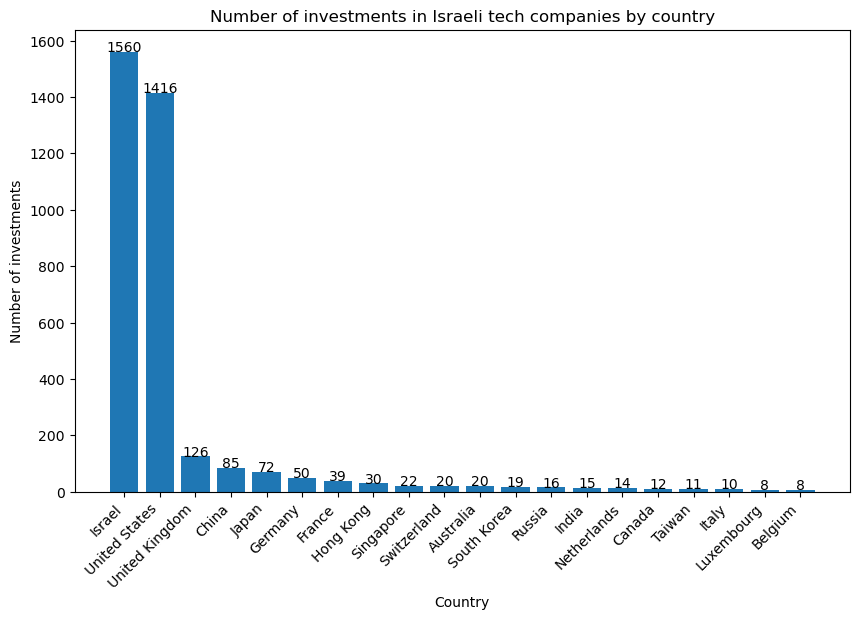

In [3]:
investments_by_country = df.groupby('HQ Country')['investor_name'].count().reset_index()
investments_by_country = investments_by_country.sort_values(by='investor_name', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
investments_by_country_top20 = investments_by_country[:20]
ax.bar(investments_by_country_top20['HQ Country'], investments_by_country_top20['investor_name'])

for i, v in enumerate(investments_by_country_top20['investor_name']):
    ax.text(i, v+1, str(v), ha='center')

ax.set_title('Number of investments in Israeli tech companies by country')
ax.set_xlabel('Country')
ax.set_ylabel('Number of investments')
ax.set_xticklabels(investments_by_country_top20['HQ Country'], rotation=45, ha='right')
plt.show()

There are different ways to measure which countries invest the most in Israeli tech companies:

- Number of investments: Here we assume that investors from different countries invest similar amounts and that the total number of investments is a good proxy for the amount invested.

- Number of investors: Here we assume that the number of investors is a good proxy for the amount invested.

If more data were available, we could measure the total amount of investment (money) made by investors from different countries.

### Types of investors in Israeli tech companies

Here we grouped the investors by entity to get better insight into the types of investors that are active in Israeli tech companies.

In [4]:
chinese_investors = df[df['HQ Country'] == 'China']
investments_by_chinese = chinese_investors.groupby('Entity Type')['round_id'].count().reset_index()
investments_by_chinese.sort_values(by='round_id', ascending=False)

,Entity Type,round_id
4,Other,21
6,VC,21
3,MNC,17
2,Corporate VC,13
7,VC and Private Equity,5
5,Private Equity,4
1,Angel,2
0,Accelerator,1


# Investment stage by region

In [5]:
import plotly.graph_objs as go
import plotly.express as px

In [6]:
countries = ['Israel', 'United States', 'China']
filtered_df = df[df['HQ Country'].isin(countries)]

counts = filtered_df.groupby(['HQ Country', 'type'])['type'].count().unstack()
counts_normalized = counts.div(counts.sum(axis=1), axis=0)

counts

type,A Round,B Round,C Round,D Round,E Round,F Round,G Round,Pre-Seed,Seed,Undisclosed Round
HQ Country,,,,,,,,,,
China,21.0,20.0,14.0,2.0,3.0,2.0,NaN,1.0,13.0,9.0
Israel,407.0,206.0,103.0,40.0,28.0,23.0,3.0,49.0,643.0,58.0
United States,318.0,299.0,169.0,64.0,46.0,26.0,2.0,24.0,397.0,71.0


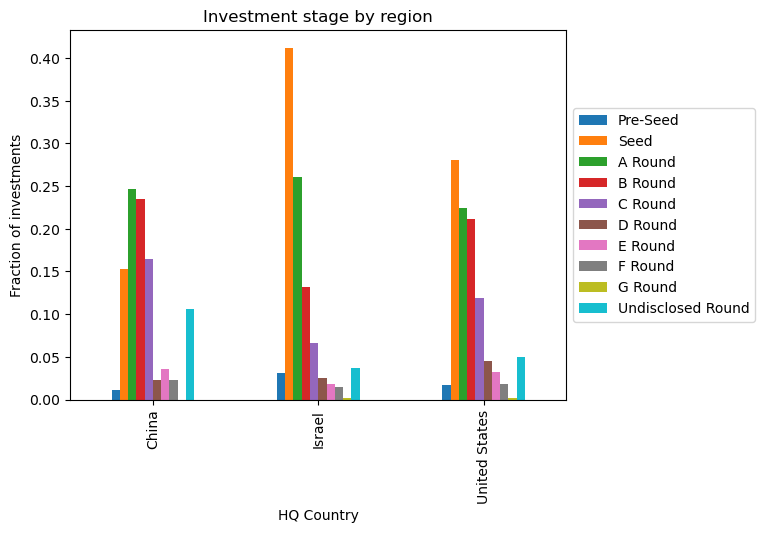

In [7]:
order = ['Pre-Seed', 'Seed', 'A Round', 'B Round', 'C Round', 'D Round', 'E Round', 'F Round', 'G Round', 'Undisclosed Round']

ax = counts_normalized[order].plot(kind='bar')
ax.set_ylabel('Fraction of investments')
ax.set_title('Investment stage by region')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Looking at the data, it appears that Israeli investors invest more in Seed and Pre-Seed stages, while having a lower percentage of investments in later stages such as Series D and beyond. On the other hand, US investors have a more balanced distribution of investments across early stages, while Chinese investors tend to have a higher percentage of investments in later stages compared to Seed and Pre-Seed stages.

This could be due to the focus on innovation and early-stage startups in Israel. Israel is known for its strong emphasis on research and development. As a result, there may be a greater focus on investing in early-stage companies that are still developing their technology.

The US has a larger and more diverse startup ecosystem, which allows for a wider range of investment opportunities.

China's focus on rapid growth and expansion, with many companies seeking to quickly scale and dominate their respective markets. It seems that they have greater emphasis on investing in companies that have already demonstrated success and have a proven business model.

##### Data quality issues

The dataset has some problems with investor and country names, which could be due to typos, variations in names (like the UK and Great Britain), acronyms, inclusion of additional information, use of different locations to define the same investor and more.

To improve the quality of the data we can take the following steps:

 - Standardizing the names: involves creating a set of standardized names for each investor and using them consistently throughout the dataset.
 - Using a lookup table: maps the variations of each investor name to the standardized name.
 - Regular data cleaning: reviewing and cleaning the data which can help identify and correct any errors.
 - Integration with external sources: such as investor databases or public data.

### Number of investments by entity type

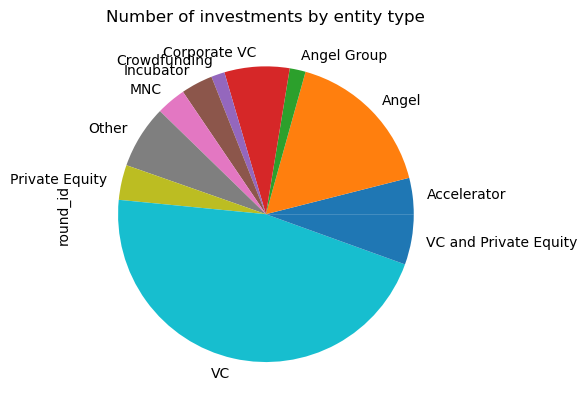

In [8]:
total_invested_by_entity = pd.pivot_table(df, values='round_id', index='Entity Type', aggfunc='count')

total_invested_by_entity.plot(kind='pie', y='round_id', legend=None)
plt.title('Number of investments by entity type')
plt.show()

The plot provides a basic understanding of the types of entities involved in the industry and their level of participation in terms of investment. VC firms make up the largest number of investments, followed by angels and corporate VCs. Thus, we can redirect our efforts to attract more of the types of investors, for example, promoting crowdfunding platforms that have preference to different type of risks.